In [1]:
pip install pandas scikit-learn matplotlib seaborn

 Dataset Shape: (45211, 17)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

 Encoded Sample:
    age  job  marital  education  default  balance  housing  loan

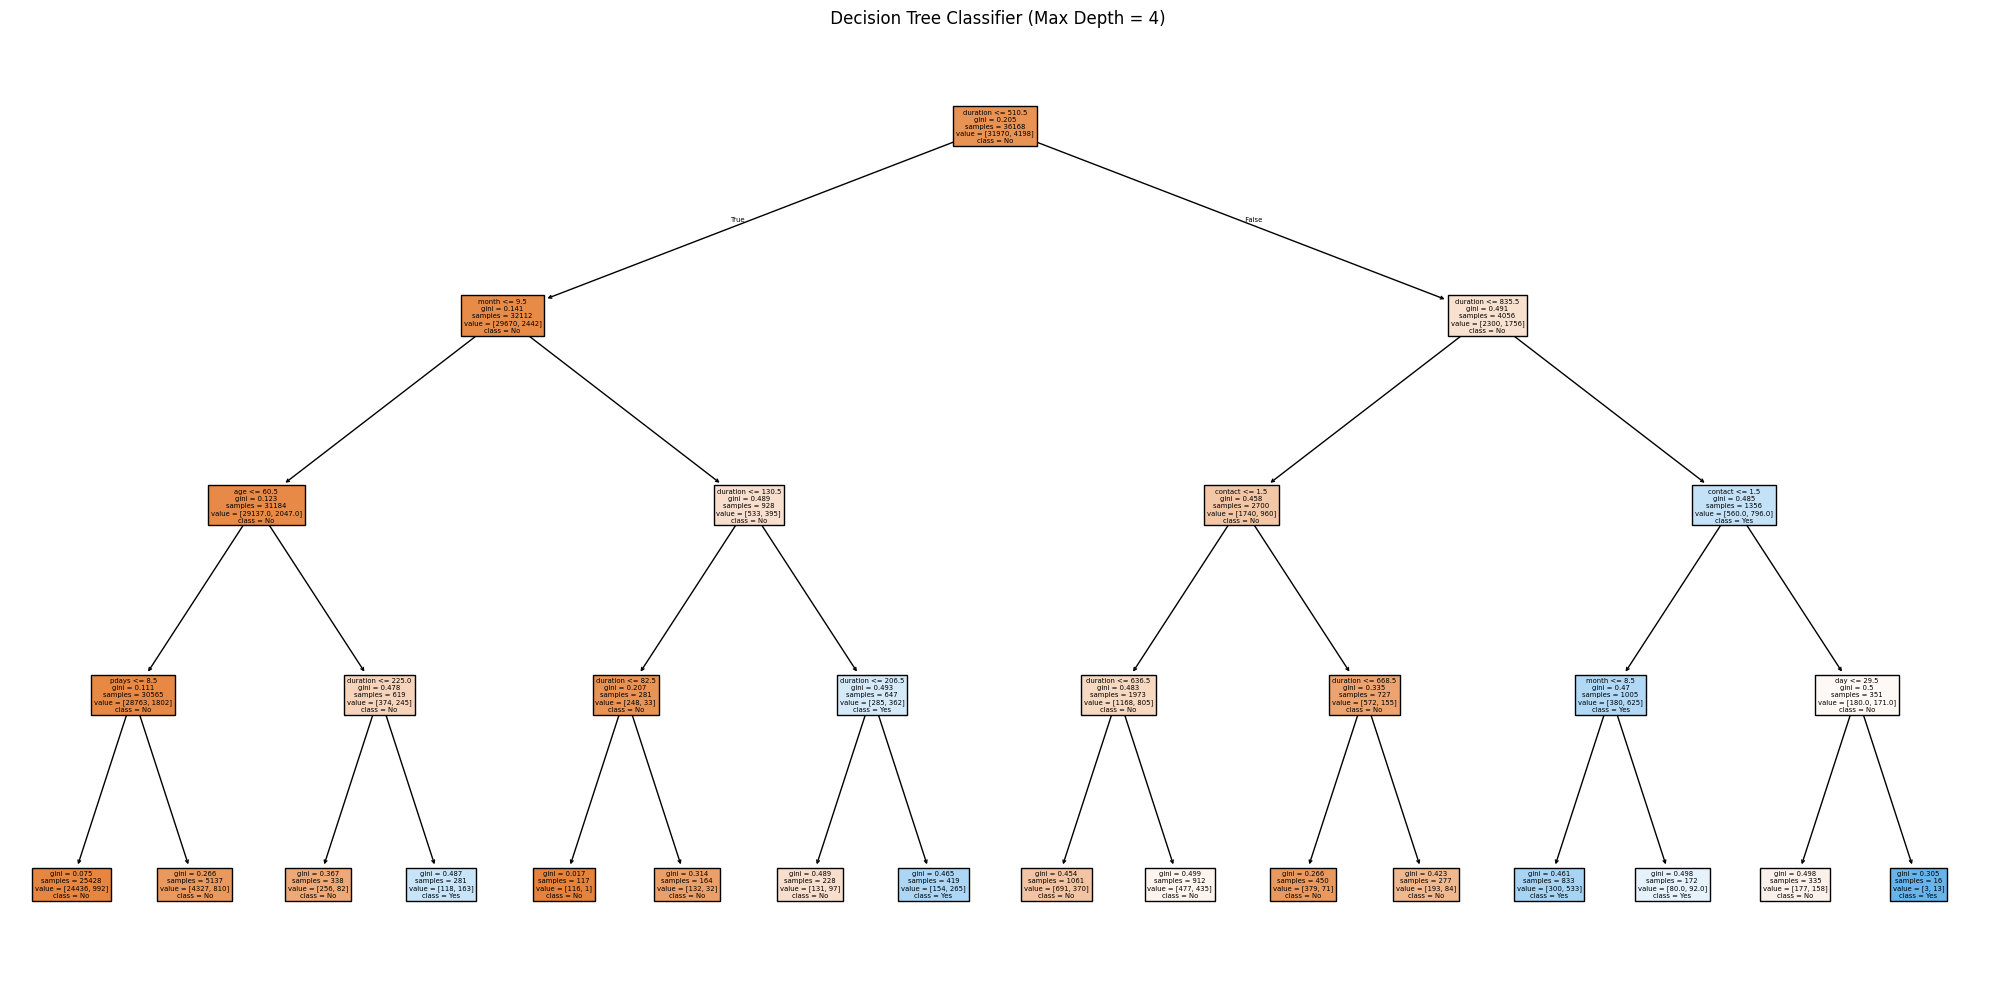


 Decision Tree Rules:

|--- duration <= 510.50
|   |--- month <= 9.50
|   |   |--- age <= 60.50
|   |   |   |--- pdays <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- pdays >  8.50
|   |   |   |   |--- class: 0
|   |   |--- age >  60.50
|   |   |   |--- duration <= 225.00
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  225.00
|   |   |   |   |--- class: 1
|   |--- month >  9.50
|   |   |--- duration <= 130.50
|   |   |   |--- duration <= 82.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  82.50
|   |   |   |   |--- class: 0
|   |   |--- duration >  130.50
|   |   |   |--- duration <= 206.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  206.50
|   |   |   |   |--- class: 1
|--- duration >  510.50
|   |--- duration <= 835.50
|   |   |--- contact <= 1.50
|   |   |   |--- duration <= 636.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  636.50
|   |   |   |   |--- class: 0
|   |   |--- contact >  1.50
|   |   |   |--- duration <= 668

/tmp/ipython-input-2-160635900.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


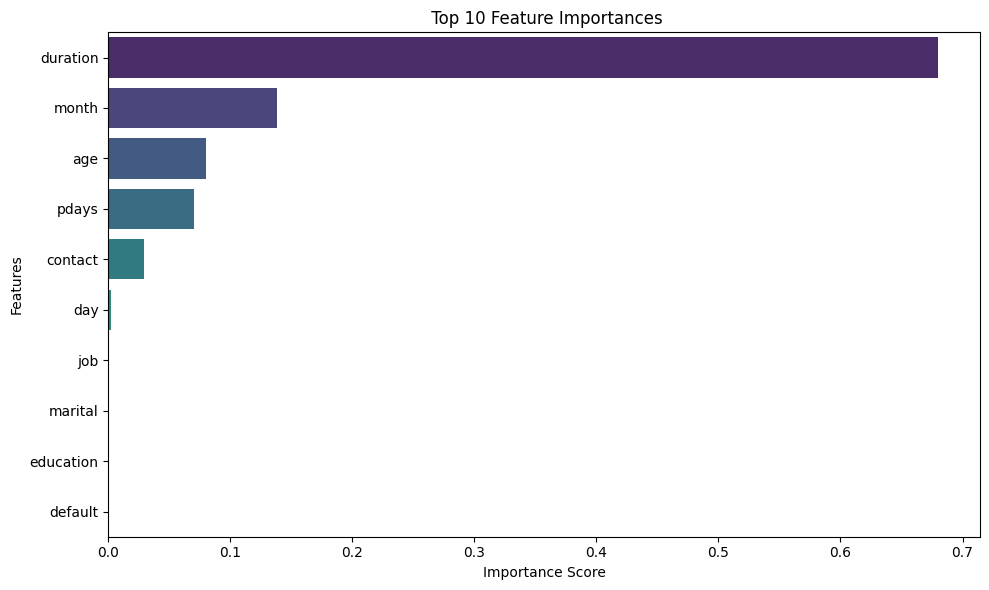

In [2]:
#Task: Decision Tree Classifier using Bank Marketing Dataset

# Load the dataset
import pandas as pd

df = pd.read_csv("bank-full.csv", sep=';')
print(" Dataset Shape:", df.shape)
print(df.head())

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
print("\n Encoded Sample:\n", df.head())

# Split dataset into features and target
X = df.drop('y', axis=1)
y = df['y']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predict and Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Visualize Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title(" Decision Tree Classifier (Max Depth = 4)")
plt.tight_layout()
plt.show()

#Print readable tree rules
from sklearn.tree import export_text

rules = export_text(model, feature_names=list(X.columns))
print("\n Decision Tree Rules:\n")
print(rules)

# Visualize Feature Importance
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title(" Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
